## Binary Classification- Sigmoid Function in action
The sigmoid function, is a mathematical curve that has a characteristic S-shaped curve. The output of the sigmoid function can be interpreted as the probability of an observation belonging to a particular class. This makes it particularly useful in classification tasks where we want to assign probabilities to different outcomes.

Several algorithms use the sigmoid function for binary classification, including:

- Logistic Regression
- Neural Networks (in the output layer for binary classification)
- Support Vector Machines with a sigmoid kernel
- Probabilistic Generative Models like Gaussian Naive Bayes when adapted for binary classification

In this notebook, I am going to explore the role of Sigmoid function in **Logistic regression** Machine Learning model.

***Disclaimer***: Agenda is to understand how Sigmoid function is put in to action in an Algorithm. This is **not** a comprehensive Logistic regression model.

**Recap:** Mathematically, the sigmoid function is computed with the formula,
$f(z) = \frac{1}{1+e^{-z}}\tag{1}$
where,
- z is the input to the sigmoid function)
- e - Euler's number (Mathematical constant)- 2.781.

In the case of logistic regression, z (the input to the sigmoid function), is the output of a linear regression model 
***(y=mx+b)***
where,
- 'm' is the slope
- 'b' is the intercept

#### Python Implementation:

In [1]:
# Importing necessary libraries to begin
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading a publicly available diabetes dataset and adding columns to it.
url='https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
col=['Pregnancies', 'Glucose', 'BP', 'Skin', 'Insulin', 'BMI', 'Pedigree', 'Age', 'Outcome']
df=pd.read_csv(url,names=col)
df.head()

,Pregnancies,Glucose,BP,Skin,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.isnull().sum()

Per the dataset, several factors influence in determining whether a person is diabetic or not. In this example, for simplicity purpose ***will be dropping all columns except BMI (Input variable) and Outcome (Target)***

Let's review how the Outcome column ranges in terms of BMI

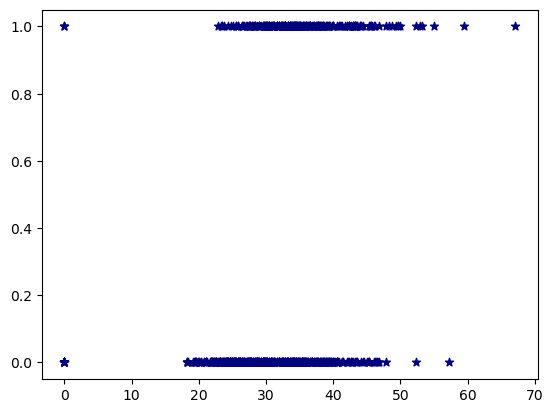

In [3]:
plt.scatter(df.BMI,df.Outcome, marker='*', c='navy')

In [4]:
print('Rows with BMI as 0 in dataset:',(df.BMI==0).sum())

Rows with BMI as 0 in dataset: 11


Seems few rows has *BMI values as **'0'***. Will be removing them along with all columns except for BMI and Outcome

In [5]:
df1 = df[df['BMI'] != 0][['BMI', 'Outcome']]
print('Rows with BMI as 0 in filtered dataset:',(df1.BMI==0).sum())
df1.head()

Rows with BMI as 0 in filtered dataset: 0


,BMI,Outcome
0,33.6,1
1,26.6,0
2,23.3,1
3,28.1,0
4,43.1,1


Let's build a Logistic Regression model **(with default variables)**. 
I will **not** be splitting the data to train and test as i will not be testing the accuracy of the model anyway

In [6]:
#Importing necessary libraries and building the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(df1[['BMI']], df1.Outcome)

LogisticRegression()

Let's calculate outcome of the model  mathematically to understand the role of sigmoid function.

In [7]:
print('Slope(m):',model.coef_)
print('Intercept(b):',model.intercept_)

Slope(m): [[0.10248332]]
Intercept(b): [-3.9962745]


In [10]:
import numpy as np
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
def prediction_function(bmi):
    y= model.coef_ * bmi + (model.intercept_)
    #y=m*x+b - Linear regression equation
    g= sigmoid(y)
    return g

I am passing few BMI Values to calculate Probablity and predictions mathematically

In [17]:
bmi = [45, 25, 30, 50]
# List comprehension to calculate diabetic probabilities , sigmoid outputs, predicted class
diabetic_probabilities = [prediction_function(bmi_val) for bmi_val in bmi]
sigmoid_output = [sigmoid(prob) for prob in range(len(bmi))]
predicted_classes = ["Diabetic" if prob >= 0.5 else "Non-Diabetic" for prob in diabetic_probabilities]

# Creating DataFrame to store results
results_df = pd.DataFrame({
    'BMI': bmi,
    'Sigmoid_output': sigmoid_output,
    'Diabetic Probability': diabetic_probabilities,
    'Predicted Class': predicted_classes
})
print(results_df)

   BMI  Sigmoid_output     Diabetic Probability Predicted Class
0   45        0.500000   [[0.6491886913980393]]        Diabetic
1   25        0.731059  [[0.19244644142653913]]    Non-Diabetic
2   30        0.880797  [[0.28459638669248305]]    Non-Diabetic
3   50        0.952574   [[0.7554495771137849]]        Diabetic


Let's calculate the predictions for the same input BMI through our ML model

In [18]:
bmi_ml = [[45], [25], [30], [50]]
probabilities = model.predict_proba(bmi_ml)
predictions = model.predict(bmi_ml)
#Using Dictionary Comprehension
result_df = pd.DataFrame({
    'BMI': [bmi[0] for bmi in bmi_ml],
    'Diabetic Probability': probabilities[:, 1],
    'Predicted Class': ['Diabetic' if pred == 1 else 'Non-Diabetic' for pred in predictions]
})
print(result_df)

   BMI  Diabetic Probability Predicted Class
0   45              0.649189        Diabetic
1   25              0.192446    Non-Diabetic
2   30              0.284596    Non-Diabetic
3   50              0.755450        Diabetic


From the above exercise, we can infer that the predicted class and the diabetic probability are exactly the same when predicting through the logistic regression model and through mathematical calculation. This helps to explain the role of the sigmoid function in the logistic regression algorithm.

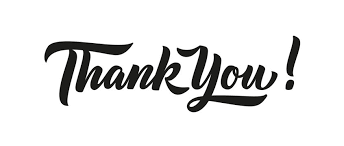